In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s6e2/sample_submission.csv
/kaggle/input/playground-series-s6e2/train.csv
/kaggle/input/playground-series-s6e2/test.csv


In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [32]:
data=pd.read_csv(r"/kaggle/input/playground-series-s6e2/sample_submission.csv")
oritrain=pd.read_csv(r"/kaggle/input/playground-series-s6e2/train.csv")
traind=pd.read_csv(r"/kaggle/input/playground-series-s6e2/train.csv")
testd=pd.read_csv(r"/kaggle/input/playground-series-s6e2/test.csv")

oritrain.head(5)

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [33]:
print(oritrain['id'].unique()[:10])

[0 1 2 3 4 5 6 7 8 9]


In [34]:
traind.isnull().sum()

id                         0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [35]:
traind.shape

(630000, 15)

In [36]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-null  int64  
 14  Hear

In [37]:
traind=traind.drop('id',axis='columns')

In [38]:
for column in traind:
    print(f'{column}:{traind[column].unique()}')

Age:[58 52 56 44 38 59 60 48 41 42 53 50 65 46 62 57 54 66 51 55 43 71 63 61
 35 49 47 67 64 45 40 70 69 37 76 34 68 39 74 77 29 75]
Sex:[1 0]
Chest pain type:[4 1 2 3]
BP:[152 125 160 134 140 138 130 120 150 108 110 178 124  94 112 128 118 100
 105 172 180 145 132 142 122 135 136 126 106 101 115 156 170 146 192 102
 117 148 104 200 165 129 174 123 144 158 133 103 147 155 149 109 168 111
 154 127 114 116 175 141 131 162  99  96  95 184]
Cholesterol:[239 325 188 229 234 283 246 245 212 197 230 263 244 231 274 282 199 226
 204 185 177 250 211 303 201 266 256 219 222 249 235 295 258 271 304 277
 203 228 269 208 254 268 206 299 221 196 240 298 288 265 198 270 243 309
 233 330 255 315 261 294 223 214 273 286 267 260 236 289 252 275 302 224
 305 218 340 248 308 300 149 209 225 213 207 180 192 327 232 200 341 227
 322 220 311 210 172 247 360 306 318 215 335 205 178 182 242 168 564 353
 195 253 407 276 313 354 257 307 409 217 175 290 321 184 174 281 319 186
 417 193 293 164 166 160 216 183 326

In [39]:
traind['Age'].mean()

np.float64(54.13670634920635)

In [40]:
traind.replace('Presence',1,inplace=True)
traind.replace('Absence',0,inplace=True)


/tmp/ipykernel_55/2619905784.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traind.replace('Absence',0,inplace=True)


In [41]:
traind.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [42]:
# traind=pd.get_dummies(data=traind,columns=['Chest pain type','EKG results','Slope of ST','Number of vessels fluro','Thallium'])

In [43]:
traind.replace(True,1,inplace=True)
traind.replace(False,0,inplace=True)

In [44]:

traind.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [45]:
traind.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [46]:
traind.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [47]:
# from sklearn.preprocessing import MinMaxScaler

# scaler=MinMaxScaler()
# traind[['Age','BP', 'Cholesterol','Max HR','ST depression']]=scaler.fit_transform(traind[['Age','BP', 'Cholesterol','Max HR','ST depression']])

In [48]:
# traind[['Age','BP', 'Cholesterol','Max HR','ST depression']] = (traind[['Age','BP', 'Cholesterol','Max HR','ST depression']] > 0.5).astype(int)


In [49]:
traind.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,1
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,0
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,0
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,0
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,1


In [50]:
for column in traind:
    print(f'{column}:{traind[column].unique()}')

Age:[58 52 56 44 38 59 60 48 41 42 53 50 65 46 62 57 54 66 51 55 43 71 63 61
 35 49 47 67 64 45 40 70 69 37 76 34 68 39 74 77 29 75]
Sex:[1 0]
Chest pain type:[4 1 2 3]
BP:[152 125 160 134 140 138 130 120 150 108 110 178 124  94 112 128 118 100
 105 172 180 145 132 142 122 135 136 126 106 101 115 156 170 146 192 102
 117 148 104 200 165 129 174 123 144 158 133 103 147 155 149 109 168 111
 154 127 114 116 175 141 131 162  99  96  95 184]
Cholesterol:[239 325 188 229 234 283 246 245 212 197 230 263 244 231 274 282 199 226
 204 185 177 250 211 303 201 266 256 219 222 249 235 295 258 271 304 277
 203 228 269 208 254 268 206 299 221 196 240 298 288 265 198 270 243 309
 233 330 255 315 261 294 223 214 273 286 267 260 236 289 252 275 302 224
 305 218 340 248 308 300 149 209 225 213 207 180 192 327 232 200 341 227
 322 220 311 210 172 247 360 306 318 215 335 205 178 182 242 168 564 353
 195 253 407 276 313 354 257 307 409 217 175 290 321 184 174 281 319 186
 417 193 293 164 166 160 216 183 326

In [51]:
traind.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease                int64
dtype: object

In [52]:
traind.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
x=traind.drop('Heart Disease',axis='columns')
y=traind['Heart Disease']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [54]:
x_train.shape

(504000, 13)

In [55]:
y_train.shape

(504000,)

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
traind.shape

(630000, 14)

In [58]:
model = keras.Sequential([
    keras.layers.Input(shape=(x_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

2026-02-01 21:57:26.806174: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [59]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [60]:
model.fit(x_train,y_train,epochs=30,batch_size=5000)

Epoch 1/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.5500 - loss: 3.3876
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6119 - loss: 0.6802
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6812 - loss: 0.6014
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7466 - loss: 0.5226
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8113 - loss: 0.4272
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8455 - loss: 0.3709
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8575 - loss: 0.3487
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8646 - loss: 0.3352
Epoch 9/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8692 - loss: 0.3245
Epoch 10/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8706 - loss: 0.3201
Epoch 11/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8724 - loss: 0.3145
Epoch 12/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 

In [61]:
yp=model.predict(x_test)

3938/3938 ━━━━━━━━━━━━━━━━━━━━ 4s 910us/step


In [62]:
yp

array([[0.15551767],
       [0.17841302],
       [0.07915172],
       ...,
       [0.72032547],
       [0.44832063],
       [0.72696584]], dtype=float32)

In [63]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [64]:
output=pd.DataFrame({'Predicted Value': y_pred,'True Value':y_test,'MATCH':y_pred==y_test})

In [65]:
output.head(5)

,Predicted Value,True Value,MATCH
158844,0,0,True
390093,0,0,True
453457,0,0,True
77299,1,1,True
306763,1,1,True


In [66]:
output['MATCH'].value_counts()

MATCH
True     110974
False     15026
Name: count, dtype: int64

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     73038
           1       0.84      0.89      0.86     52962

    accuracy                           0.88    126000
   macro avg       0.88      0.88      0.88    126000
weighted avg       0.88      0.88      0.88    126000



Text(50.722222222222214, 0.5, 'True Values')

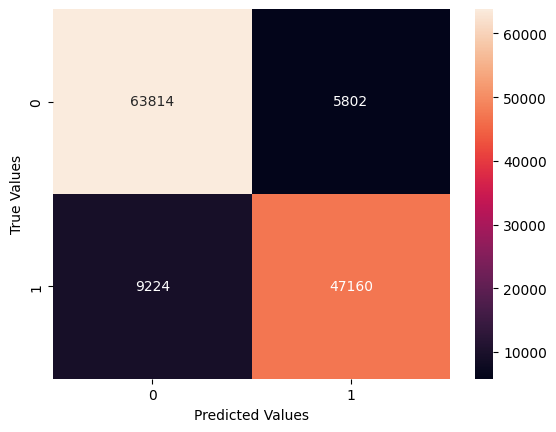

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [83]:
test = pd.read_csv("/kaggle/input/playground-series-s6e2/test.csv")
test_features = test.drop(columns=["id"])
y_pred_prob = model.predict(test_features).flatten()
submission = pd.DataFrame({
    "id": test["id"],
    "Heart Disease": y_pred_prob
})
submission.to_csv("submission.csv", index=False)



8438/8438 ━━━━━━━━━━━━━━━━━━━━ 8s 902us/step


In [85]:
submission.shape

(270000, 2)

In [87]:
x_test.shape

(126000, 13)

In [88]:
x_train.shape

(504000, 13)

In [89]:
submission.head(5)

,id,Heart Disease
0,630000,0.876532
1,630001,0.021504
2,630002,0.950565
3,630003,0.044328
4,630004,0.235147
